In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import os  
os.chdir("/Users/randy/OneDrive/Escritorio")

In [93]:
df = pd.read_excel("Mexico GDP.xlsx")
df.head()

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


In [94]:
df.describe()

,Periodo,GDP
count,62.000000,6.200000e+01
mean,1990.500000,4.866155e+11
std,18.041619,4.544804e+11
min,1960.000000,1.304000e+10
25%,1975.250000,8.336062e+10
50%,1990.500000,2.885511e+11
75%,2005.750000,8.944031e+11
max,2021.000000,1.315351e+12


In [95]:
cdf = df[['Periodo', 'GDP']]
cdf.head(5)

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10


array([[<Axes: title={'center': 'GDP'}>]], dtype=object)

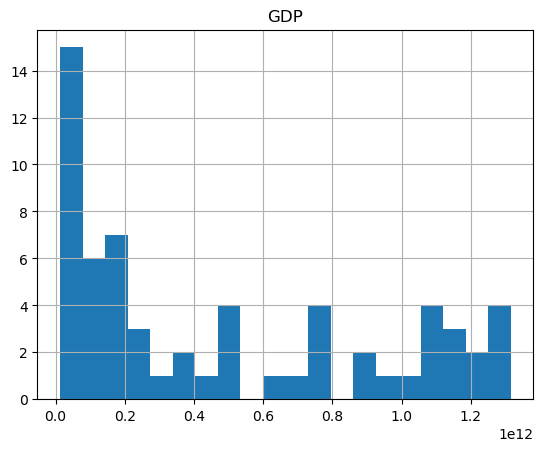

In [96]:
viz = cdf[['GDP']]
viz.hist(bins=20)

<function matplotlib.pyplot.show(close=None, block=None)>

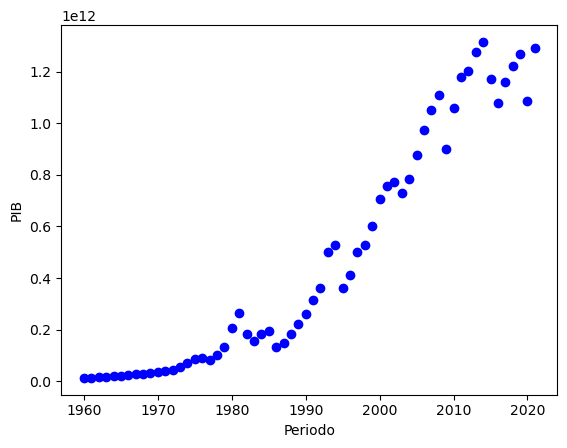

In [97]:
plt.scatter(cdf.Periodo, cdf.GDP, color='blue') 
plt.xlabel('Periodo')   
plt.ylabel('PIB') 
plt.show 

In [98]:
msk = np.random.rand(len(df)) <= 0.80
msk 

array([False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True])

In [99]:
train = cdf[msk]
train 

,Periodo,GDP
1,1961,1.416000e+10
4,1964,2.008000e+10
6,1966,2.432000e+10
7,1967,2.656000e+10
8,1968,2.936000e+10
9,1969,3.248000e+10
10,1970,3.552000e+10
11,1971,3.920000e+10
12,1972,4.520000e+10
13,1973,5.528000e+10


In [100]:
test = cdf[~msk]
test 

,Periodo,GDP
0,1960,1.304000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
5,1965,2.184000e+10
15,1975,8.800000e+10
21,1981,2.639593e+11
27,1987,1.475407e+11
31,1991,3.131428e+11
33,1993,5.007361e+11
48,2008,1.109989e+12


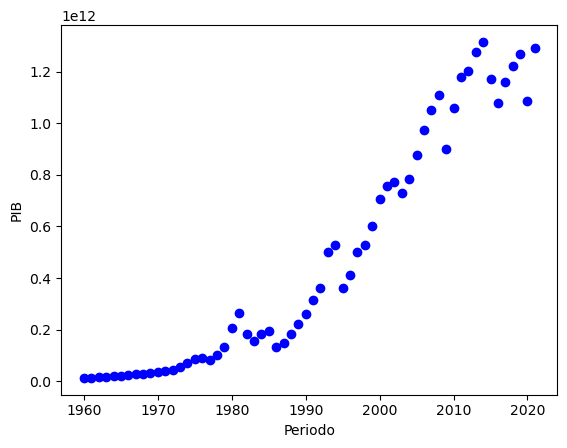

In [101]:
plt.scatter(cdf.Periodo, cdf.GDP, color='Blue')
plt.xlabel('Periodo')
plt.ylabel('PIB')
plt.show()

In [102]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Periodo']]) # 
train_y = np.asanyarray(train[['GDP']])

regr.fit (train_x, train_y)

LinearRegression()

In [103]:
print('Coeficiente de Pendiente', regr.coef_)
print('Coeficiente de Intercepto', regr.intercept_)

Coeficiente de Pendiente [[2.44354088e+10]]
Coeficiente de Intercepto [-4.81738065e+13]


Text(0, 0.5, 'PIB')

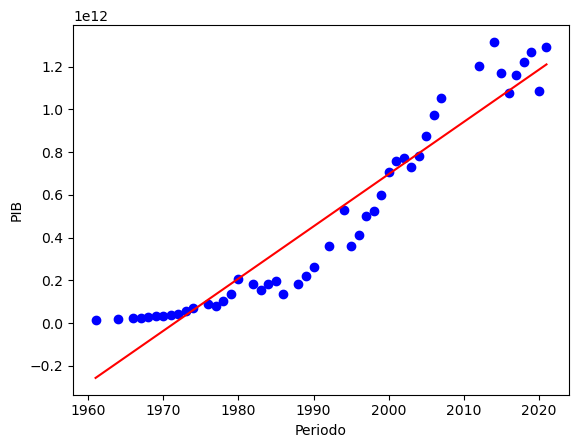

In [104]:
plt.scatter(train.Periodo, train.GDP, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Periodo')
plt.ylabel('PIB')

In [105]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Periodo']])
test_y = np.asanyarray(test[['GDP']])
test_y_hat = regr.predict(test_x)

In [106]:
test_y_hat

array([[-2.80405165e+11],
       [-2.31534347e+11],
       [-2.07098938e+11],
       [-1.58228121e+11],
       [ 8.61259677e+10],
       [ 2.32738421e+11],
       [ 3.79350874e+11],
       [ 4.77092509e+11],
       [ 5.25963327e+11],
       [ 8.92494459e+11],
       [ 9.16929868e+11],
       [ 9.41365277e+11],
       [ 9.65800686e+11],
       [ 1.01467150e+12]])

In [107]:
test_y

array([[1.30400000e+10],
       [1.52000000e+10],
       [1.69600000e+10],
       [2.18400000e+10],
       [8.80000000e+10],
       [2.63959337e+11],
       [1.47540738e+11],
       [3.13142768e+11],
       [5.00736066e+11],
       [1.10998906e+12],
       [9.00045351e+11],
       [1.05780130e+12],
       [1.18048960e+12],
       [1.27444308e+12]])

In [108]:
print('Mean absolute Erro: %.2f' % np.mean(np.absolute(test_y_hat - test_y)))
print('Residual sum of squares (MSE): %.2f' % np.mean((test_y_hat - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_hat , test_y) )

Mean absolute Erro: 158833163870.46
Residual sum of squares (MSE): 34754564911715703586816.00
R2-score: 0.85


In [109]:
def pol_grado1(x, beta_0, beta_1):
    y = beta_0 + beta_1 * x
    return y

In [110]:
x = np.arange(-5.0, 5.0, 0.1)
y = pol_grado1(x, 3, 2)
y_noise = np.random.normal(0, 1, size=x.size)
ydata = y + y_noise

<function matplotlib.pyplot.show(close=None, block=None)>

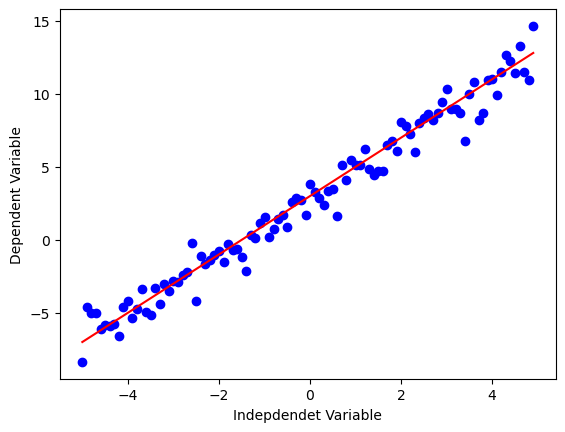

In [111]:
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendet Variable')
plt.show

In [112]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(pol_grado1, x, ydata)

In [113]:
print('beta_0', popt[0], 'beta_1', popt[1])

beta_0 2.8300533557438596 beta_1 1.9553254731342569


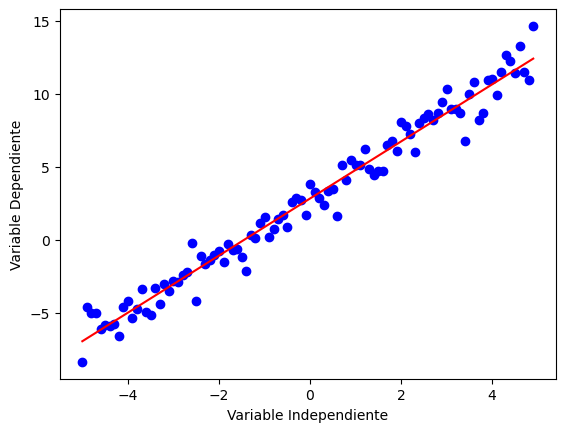

In [114]:
y_ajust = pol_grado1(x, popt[0], popt[1])
plt.plot(x, ydata, 'bo')
plt.plot(x, y_ajust, 'r')
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()